Файл lab2_data.csv успешно создан с 400 строками данных.


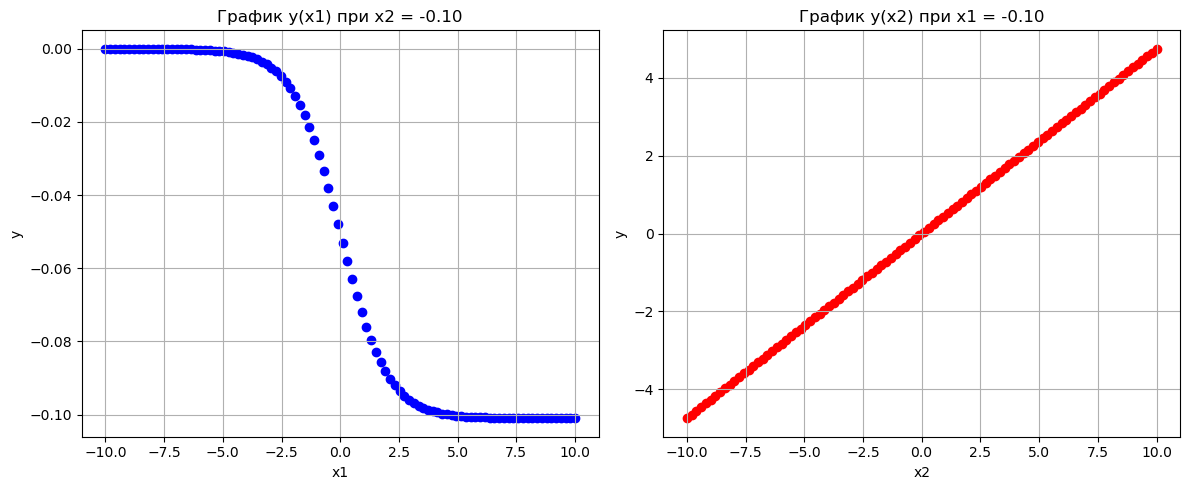

Статистика по столбцам:
x1:
  Среднее: -0.00
  Минимальное: -10.00
  Максимальное: 10.00

x2:
  Среднее: -0.00
  Минимальное: -10.00
  Максимальное: 10.00

y:
  Среднее: -0.00
  Минимальное: -10.00
  Максимальное: 10.00

Сохранено 7500 строк в lab2_filtered_data.csv


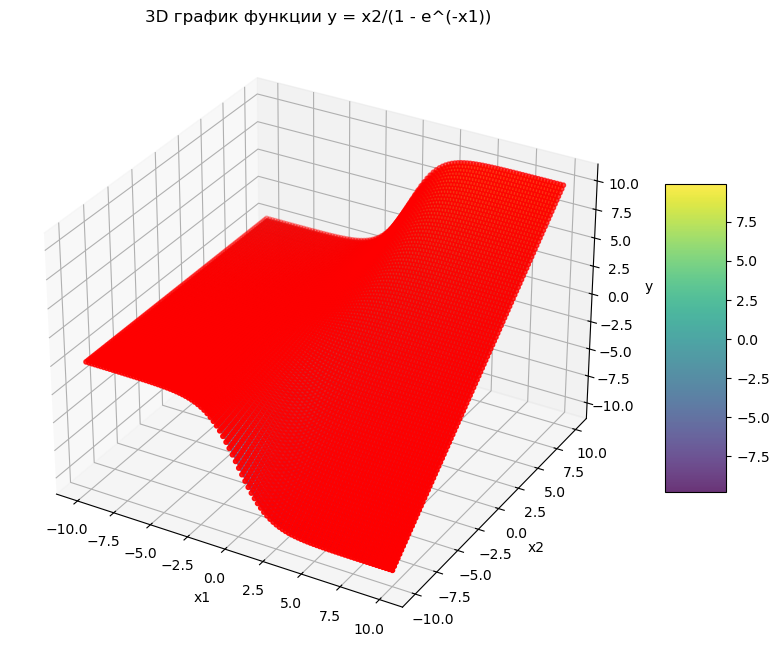

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def generate_data():

    x1 = np.linspace(-10, 10, 100) 
    x2 = np.linspace(-10, 10, 100)  
    
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    
    y = x2_grid/(1+np.exp(-x1_grid)+1e-10)
    
    x1_flat = x1_grid.flatten()
    x2_flat = x2_grid.flatten()
    y_flat = y.flatten()
    
    df = pd.DataFrame({
        'x1': x1_flat,
        'x2': x2_flat,
        'y': y_flat
    })
    
    df.to_csv('lab2_data.csv', index=False)
    return df

def plot_graphs(df):

    x2_const = df['x2'].mean()

    closest_x2 = df['x2'].iloc[(df['x2']-x2_const).abs().argsort()[:1]].values[0]
    df_x2_const = df[np.isclose(df['x2'], closest_x2, atol=0.01)]  
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(df_x2_const['x1'], df_x2_const['y'], color='blue')
    plt.title(f'График y(x1) при x2 = {closest_x2:.2f}')
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.grid(True)

    x1_const = df['x1'].mean()
    closest_x1 = df['x1'].iloc[(df['x1']-x1_const).abs().argsort()[:1]].values[0]
    df_x1_const = df[np.isclose(df['x1'], closest_x1, atol=0.01)]
    
    plt.subplot(1, 2, 2)
    plt.scatter(df_x1_const['x2'], df_x1_const['y'], color='red')
    plt.title(f'График y(x2) при x1 = {closest_x1:.2f}')
    plt.xlabel('x2')
    plt.ylabel('y')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def print_statistics(df):
    print("Статистика по столбцам:")
    for col in df.columns:
        print(f"{col}:")
        print(f"  Среднее: {df[col].mean():.2f}")
        print(f"  Минимальное: {df[col].min():.2f}")
        print(f"  Максимальное: {df[col].max():.2f}")
        print()

def filter_and_save(df):
    mean_x1 = df['x1'].mean()
    mean_x2 = df['x2'].mean()
    
    filtered_df = df[(df['x1'] < mean_x1) | (df['x2'] < mean_x2)]
    filtered_df.to_csv('lab2_filtered_data.csv', index=False)
    print(f"Сохранено {len(filtered_df)} строк в lab2_filtered_data.csv")

def plot_3d(df):
    x1 = df['x1'].unique()
    x2 = df['x2'].unique()
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    y_grid = df['y'].values.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(x1_grid, x2_grid, y_grid, cmap='viridis', alpha=0.8)
    ax.scatter(df['x1'], df['x2'], df['y'], color='red', s=10)
    
    ax.set_title('3D график функции y = x2/(1 - e^(-x1))')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

def main():

    df = generate_data()
    print("Файл lab2_data.csv успешно создан с 400 строками данных.")

    plot_graphs(df)
    print_statistics(df)
    filter_and_save(df)
    plot_3d(df)

if __name__ == "__main__":
    main()